In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt 
import plotly.express as px
import plotly.graph_objs as go

In [57]:
d1 = pd.read_csv("02-14-2018.csv")
d2 = pd.read_csv("02-15-2018.csv")
d3 = pd.read_csv("02-16-2018.csv")
d4 = pd.read_csv("02-21-2018.csv")
d7 = pd.read_csv("03-02-2018.csv")

/tmp/ipykernel_101/922435159.py:5: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  d5 = pd.read_csv("02-28-2018.csv")
/tmp/ipykernel_101/922435159.py:6: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  d6 = pd.read_csv("03-01-2018.csv")


In [61]:
d5 = d5.loc[d5["Timestamp"].str.contains("/")]
d5 = d5.loc[d5["Dst Port"].str.contains("[0-9]")]
d6 = d6.loc[d6["Timestamp"].str.contains("/")]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [35]:
d1['Timestamp']=pd.to_datetime(d1["Timestamp"], format = "%d/%m/%Y %H:%M:%S")
d2["Timestamp"]=pd.to_datetime(d2["Timestamp"], format = "%d/%m/%Y %H:%M:%S")
d3["Timestamp"]=pd.to_datetime(d3["Timestamp"], format = "%d/%m/%Y %H:%M:%S")
d4["Timestamp"]=pd.to_datetime(d4["Timestamp"], format = "%d/%m/%Y %H:%M:%S")
d5["Timestamp"]=pd.to_datetime(d5["Timestamp"], format = "%d/%m/%Y %H:%M:%S")
d6["Timestamp"]=pd.to_datetime(d6["Timestamp"], format = "%d/%m/%Y %H:%M:%S")
d7["Timestamp"]=pd.to_datetime(d7["Timestamp"], format = "%d/%m/%Y %H:%M:%S")

In [36]:
data=pd.concat([d1,d2,d3,d4,d5,d6,d7],axis=0)
data

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,2018-02-14 08:31:01,112641719,3,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,56320859.5,139.300036,56320958.0,56320761.0,Benign
1,0,0,2018-02-14 08:33:50,112641466,3,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,56320733.0,114.551299,56320814.0,56320652.0,Benign
2,0,0,2018-02-14 08:36:39,112638623,3,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,56319311.5,301.934596,56319525.0,56319098.0,Benign
3,22,6,2018-02-14 08:40:13,6453966,15,10,1239,2273,744,0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,22,6,2018-02-14 08:40:23,8804066,14,11,1143,2209,744,0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88637,53,17,2018-03-02 09:51:29,1217,1,1,30,78.0,30,30,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
88638,3389,6,2018-03-02 03:40:51,1711199,8,7,1144,1581.0,677,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
88639,445,6,2018-03-02 10:55:55,543763,7,4,286,170.0,103,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
88640,53,17,2018-03-02 08:59:29,411,1,1,42,58.0,42,42,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [37]:
data["hour"] = data["Timestamp"].dt.hour
data["day"] = data["Timestamp"].dt.day
data["month"] = data["Timestamp"].dt.month
data["year"] = data["Timestamp"].dt.year

In [ ]:
data.dropna(axis = 0, inplace = True)

In [10]:
data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643421 entries, 0 to 88640
Data columns (total 84 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Dst Port           643421 non-null  object        
 1   Protocol           643421 non-null  object        
 2   Timestamp          643421 non-null  datetime64[ns]
 3   Flow Duration      643421 non-null  object        
 4   Tot Fwd Pkts       643421 non-null  object        
 5   Tot Bwd Pkts       643421 non-null  object        
 6   TotLen Fwd Pkts    643421 non-null  object        
 7   TotLen Bwd Pkts    643421 non-null  object        
 8   Fwd Pkt Len Max    643421 non-null  object        
 9   Fwd Pkt Len Min    643421 non-null  object        
 10  Fwd Pkt Len Mean   643421 non-null  object        
 11  Fwd Pkt Len Std    643421 non-null  object        
 12  Bwd Pkt Len Max    643421 non-null  object        
 13  Bwd Pkt Len Min    643421 non-null  object   

In [11]:
data.reset_index(drop = True)

,Timestamp,Label,hour,day,month,year
0,2018-02-14 08:31:01,Benign,8.0,14.0,2.0,2018.0
1,2018-02-14 08:33:50,Benign,8.0,14.0,2.0,2018.0
2,2018-02-14 08:36:39,Benign,8.0,14.0,2.0,2018.0
3,2018-02-14 08:40:13,Benign,8.0,14.0,2.0,2018.0
4,2018-02-14 08:40:23,Benign,8.0,14.0,2.0,2018.0
...,...,...,...,...,...,...
644749,2018-03-02 09:17:01,Benign,9.0,2.0,3.0,2018.0
644750,2018-03-02 09:51:29,Benign,9.0,2.0,3.0,2018.0
644751,2018-03-02 03:40:51,Benign,3.0,2.0,3.0,2018.0
644752,2018-03-02 10:55:55,Benign,10.0,2.0,3.0,2018.0


In [12]:
data.describe()

,hour,day,month,year
count,644754.000000,644754.000000,644754.000000,644754.0
mean,7.487052,17.116626,2.137480,2018.0
std,3.904861,8.025831,0.344354,0.0
min,1.000000,2.000000,2.000000,2018.0
25%,2.000000,14.000000,2.000000,2018.0
50%,10.000000,16.000000,2.000000,2018.0
75%,10.000000,21.000000,2.000000,2018.0
max,12.000000,28.000000,3.000000,2018.0


In [13]:
encoding={'Benign':0, 'FTP-BruteForce':1,'DoS attacks-GoldenEye':2, 'DoS attacks-Slowloris':3,'DoS attacks-SlowHTTPTest':4, 'DoS attacks-Hulk':5}

In [14]:
data['Label']=data['Label'].map(encoding)

In [15]:
data.Label.value_counts()

0.0    194937
1.0    128108
4.0     91434
2.0     41508
5.0     18501
3.0     10990
Name: Label, dtype: int64

In [16]:
data = data.set_index('Timestamp')
data['Timestamp'] = data.index

# Benign
benign_count = data.query("Label == 0")\
                .groupby("Label").resample('s', on='Timestamp')\
                .count().Label.rename("benign_count")#.to_frame()

benign_count = benign_count[0].to_frame()

# FTP-BruteForce
ftp_bf_count = data.query("Label == 1")\
                .groupby("Label").resample('s', on='Timestamp')\
                .count().Label.rename("ftp_bf_count")

ftp_bf_count = ftp_bf_count.to_frame().droplevel(level=0)

# DoS attacks-GoldenEye
dos_ge_count = data.query("Label == 2")\
                .groupby("Label").resample('s', on='Timestamp')\
                .count().Label.rename("dos_ge_count")

dos_ge_count = dos_ge_count.to_frame().droplevel(level=0)

# DoS attacks-Slowloris
dos_sl_count = data.query("Label == 3")\
                .groupby("Label").resample('s', on='Timestamp')\
                .count().Label.rename("dos_sl_count")

dos_sl_count = dos_sl_count.to_frame().droplevel(level=0)

# DoS attacks-SlowHTTPTest
dos_shttpst_count = data.query("Label == 4")\
                .groupby("Label").resample('s', on='Timestamp')\
                .count().Label.rename("dos_shttpst_count")

dos_shttpst_count = dos_shttpst_count.to_frame().droplevel(level=0)

# DoS attacks-Hulk
dos_hulk_count = data.query("Label == 5")\
                .groupby("Label").resample('s', on='Timestamp')\
                .count().Label.rename("dos_hulk_count")

dos_hulk_count = dos_hulk_count.to_frame().droplevel(level=0)

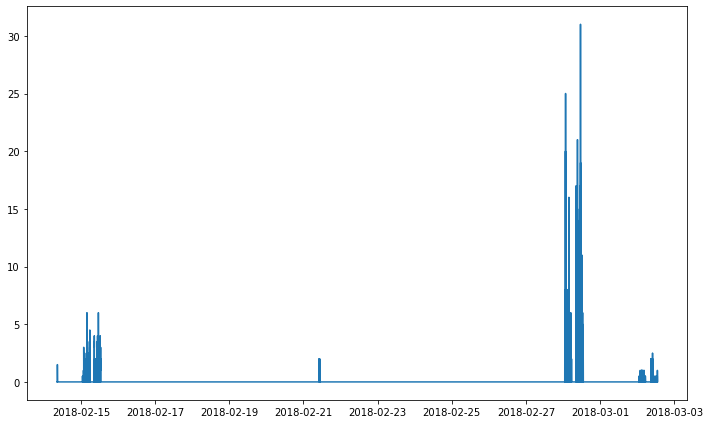

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(benign_count.rolling(window = 30).median())
plt.tight_layout()
plt.show()

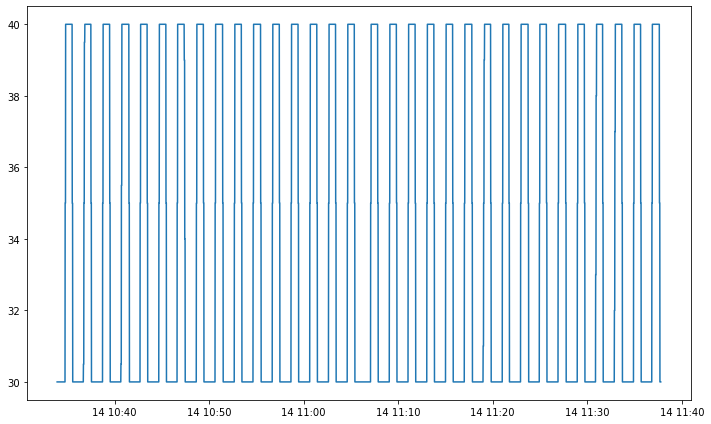

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(ftp_bf_count.rolling(window = 30).median())
plt.tight_layout()
plt.show()

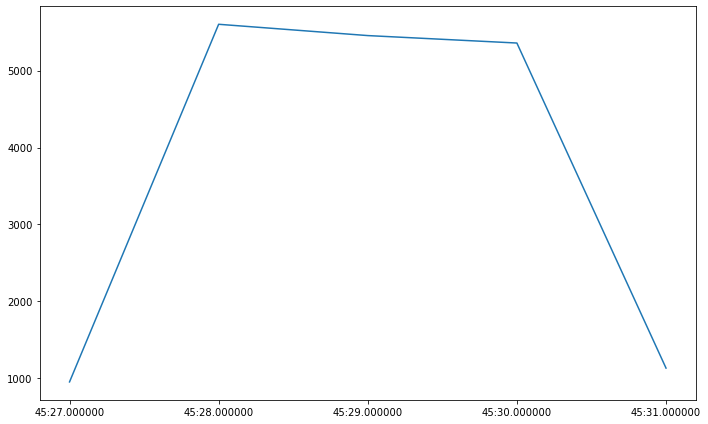

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(dos_hulk_count)
plt.tight_layout()
plt.show()

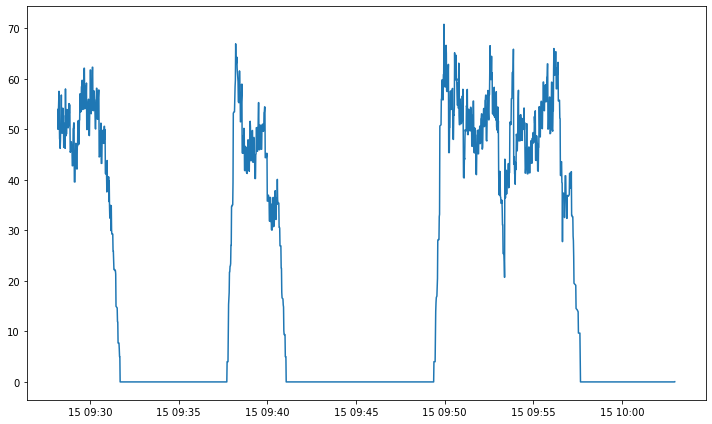

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(dos_ge_count.rolling(window = 30).mean())
plt.tight_layout()
plt.show()

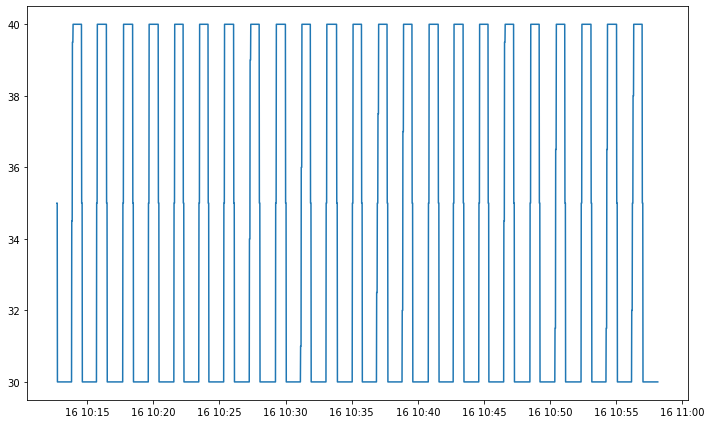

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(dos_shttpst_count.rolling(window = 30).median())
plt.tight_layout()
plt.show()

In [22]:
counts = pd.concat([benign_count, ftp_bf_count, dos_ge_count, dos_sl_count, dos_shttpst_count, dos_hulk_count], axis = 1, sort = True)

In [23]:
copy = counts

copy = copy.fillna(0).loc[copy.index.month == 2]
copy["ftp_bf_count"]=copy["ftp_bf_count"].shift(periods=86400)
copy["dos_hulk_count"]=copy["dos_hulk_count"].shift(periods=-57600)
copy.dropna(inplace = True)
copy = copy.loc[copy.index.day < 16]

In [24]:
copy

,benign_count,ftp_bf_count,dos_ge_count,dos_sl_count,dos_shttpst_count,dos_hulk_count
Timestamp,,,,,,
2018-02-15 08:30:38,0,0.0,0.0,0.0,0.0,0.0
2018-02-15 08:30:39,0,0.0,0.0,0.0,0.0,0.0
2018-02-15 08:30:40,1,0.0,0.0,0.0,0.0,0.0
2018-02-15 08:30:41,1,0.0,0.0,0.0,0.0,0.0
2018-02-15 08:30:42,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2018-02-15 23:59:55,0,0.0,0.0,0.0,0.0,0.0
2018-02-15 23:59:56,0,0.0,0.0,0.0,0.0,0.0
2018-02-15 23:59:57,0,0.0,0.0,0.0,0.0,0.0


In [25]:
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())
for col in copy.columns:
    copy[col] = min_max_scaling(copy[col])

In [26]:
copy = copy.loc[copy.index.hour < 13]

In [27]:
copy.isnull().sum()

benign_count             0
ftp_bf_count             0
dos_ge_count             0
dos_sl_count             0
dos_shttpst_count    16162
dos_hulk_count           0
dtype: int64

In [28]:
copy

,benign_count,ftp_bf_count,dos_ge_count,dos_sl_count,dos_shttpst_count,dos_hulk_count
Timestamp,,,,,,
2018-02-15 08:30:38,0.000000,0.0,0.0,0.0,NaN,0.0
2018-02-15 08:30:39,0.000000,0.0,0.0,0.0,NaN,0.0
2018-02-15 08:30:40,0.002045,0.0,0.0,0.0,NaN,0.0
2018-02-15 08:30:41,0.002045,0.0,0.0,0.0,NaN,0.0
2018-02-15 08:30:42,0.000000,0.0,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...
2018-02-15 12:59:55,0.000000,0.0,0.0,0.0,NaN,0.0
2018-02-15 12:59:56,0.000000,0.0,0.0,0.0,NaN,0.0
2018-02-15 12:59:57,0.000000,0.0,0.0,0.0,NaN,0.0


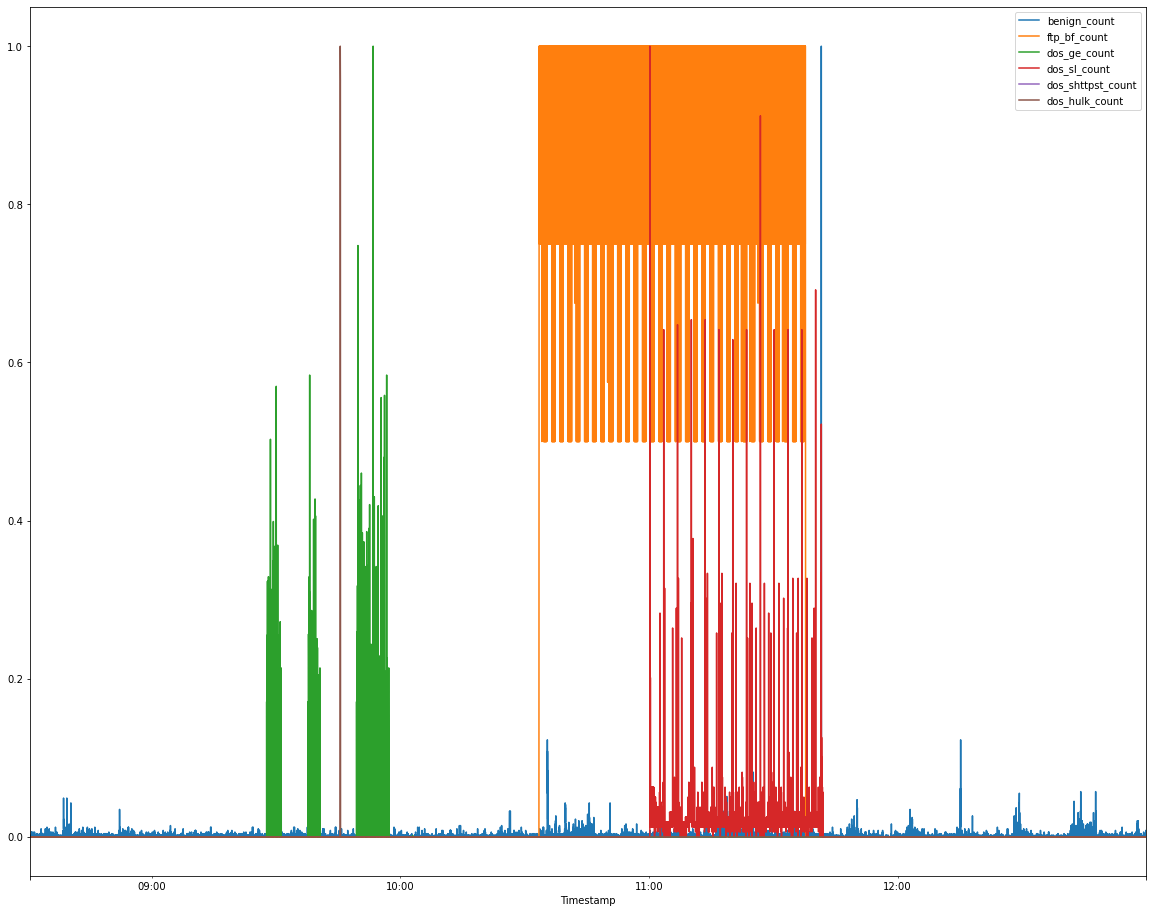

In [29]:
copy.plot(figsize=(20, 16))
plt.show()

<AxesSubplot:ylabel='Density'>

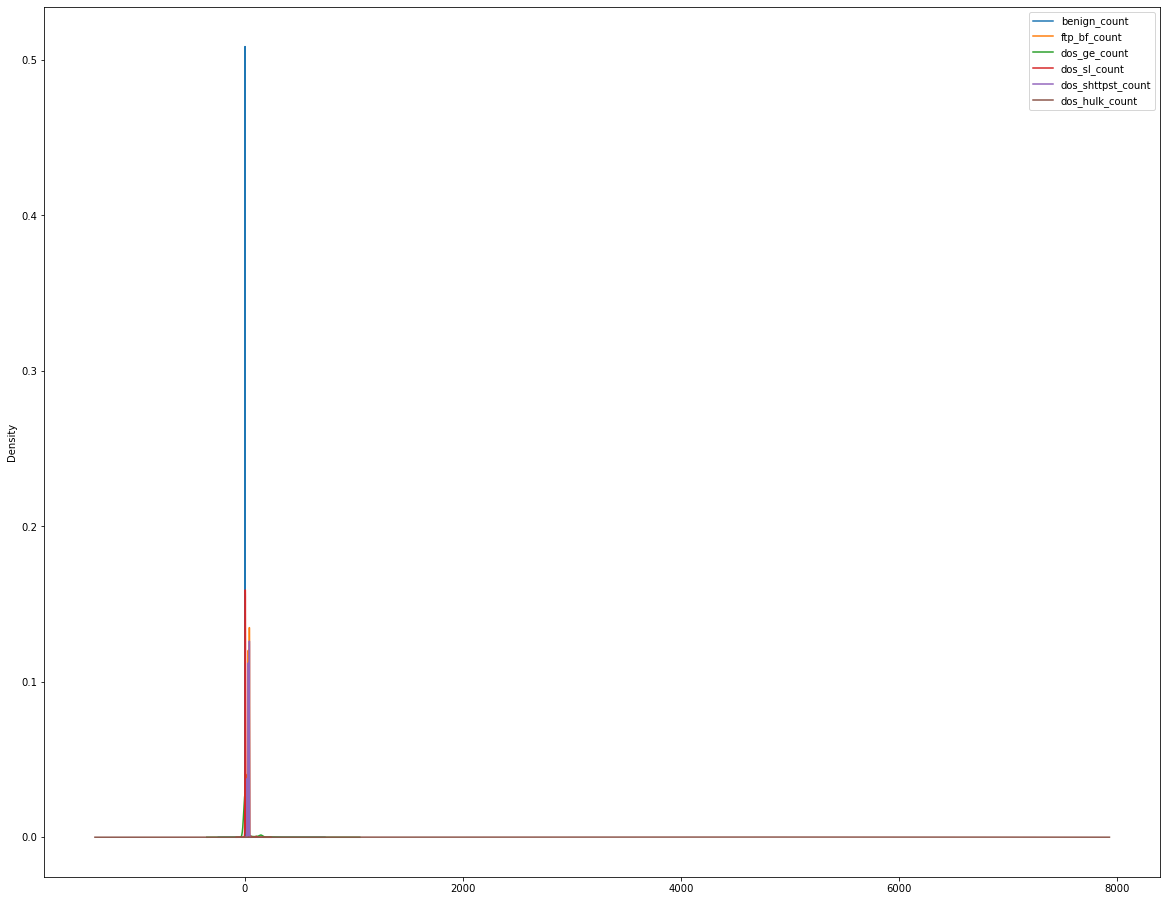

In [30]:
counts.plot.density(figsize=(20, 16))

In [31]:
!pip install plotly

In [41]:
d1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128230 entries, 0 to 128229
Data columns (total 80 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Dst Port           128230 non-null  int64         
 1   Protocol           128230 non-null  int64         
 2   Timestamp          128230 non-null  datetime64[ns]
 3   Flow Duration      128230 non-null  int64         
 4   Tot Fwd Pkts       128230 non-null  int64         
 5   Tot Bwd Pkts       128230 non-null  int64         
 6   TotLen Fwd Pkts    128230 non-null  int64         
 7   TotLen Bwd Pkts    128230 non-null  int64         
 8   Fwd Pkt Len Max    128230 non-null  int64         
 9   Fwd Pkt Len Min    128230 non-null  int64         
 10  Fwd Pkt Len Mean   128230 non-null  float64       
 11  Fwd Pkt Len Std    128230 non-null  float64       
 12  Bwd Pkt Len Max    128230 non-null  int64         
 13  Bwd Pkt Len Min    128230 non-null  int64   

In [50]:
types={
        'Dst Port' :np.int64,
        'Protocol':np.int64,       
        'Timestamp':np.object,
        'Flow Duration':np.int64,        
        'Tot Fwd Pkts':np.int64,        
        'Tot Bwd Pkts':np.int64,         
        'TotLen Fwd Pkts':np.int64,         
        'TotLen Bwd Pkts':np.int64,         
        'Fwd Pkt Len Max':np.int64,         
        'Fwd Pkt Len Min':np.int64,         
        'Fwd Pkt Len Mean':np.float64,      
        'Fwd Pkt Len Std' :np.float64,      
        'Bwd Pkt Len Max' :np.int64,         
        'Bwd Pkt Len Min' :np.int64,         
        'Bwd Pkt Len Mean':np.float64,       
        'Bwd Pkt Len Std' :np.float64,       
        'Flow Byts/s':np.float64,       
        'Flow Pkts/s':np.float64,       
        'Flow IAT Mean':np.float64,       
        'Flow IAT Std':np.float64,       
        'Flow IAT Max':np.int64,         
        'Flow IAT Min':np.int64,         
        'Fwd IAT Tot':np.int64,        
        'Fwd IAT Mean':np.float64,       
        'Fwd IAT Std':np.float64,       
        'Fwd IAT Max':np.int64,       
        'Fwd IAT Min':np.int64,       
        'Bwd IAT Tot':np.int64,       
        'Bwd IAT Mean':np.float64,       
        'Bwd IAT Std':np.float64,       
        'Bwd IAT Max':np.int64,       
        'Bwd IAT Min':np.int64,        
        'Fwd PSH Flags':np.int64,       
        'Bwd PSH Flags':np.int64,     
        'Fwd URG Flags':np.int64,     
        'Bwd URG Flags':np.float64,     
        'Fwd Header Len':np.float64,     
        'Bwd Header Len':np.float64,     
        'Fwd Pkts/s':np.float64,     
        'Bwd Pkts/s':np.float64,     
        'Pkt Len Min':np.float64,      
        'Pkt Len Max':np.float64,       
        'Pkt Len Mean':np.float64,       
        'Pkt Len Std':np.float64,      
        'Pkt Len Var':np.float64,       
        'FIN Flag Cnt':np.float64,      
        'SYN Flag Cnt':np.float64,       
        'RST Flag Cnt':np.float64,       
        'PSH Flag Cnt':np.float64,       
        'ACK Flag Cnt':np.float64,       
        'URG Flag Cnt':np.float64,       
        'CWE Flag Count':np.float64,       
        'ECE Flag Cnt':np.float64,      
        'Down/Up Ratio':np.float64,       
        'Pkt Size Avg':np.float64,      
        'Fwd Seg Size Avg':np.float64,       
        'Bwd Seg Size Avg':np.float64,       
        'Fwd Byts/b Avg':np.float64,       
        'Fwd Pkts/b Avg':np.float64,       
        'Fwd Blk Rate Avg':np.float64,       
        'Bwd Byts/b Avg':np.float64,       
        'Bwd Pkts/b Avg':np.float64 ,      
        'Bwd Blk Rate Avg':np.float64,       
        'Subflow Fwd Pkts':np.float64 ,      
        'Subflow Fwd Byts':np.float64 ,      
        'Subflow Bwd Pkts':np.float64 ,      
        'Subflow Bwd Byts':np.float64 ,      
        'Init Fwd Win Byts':np.float64 ,      
        'Init Bwd Win Byts':np.float64 ,      
        'Fwd Act Data Pkts':np.float64 ,      
        'Fwd Seg Size Min':np.float64 ,      
        'Active Mean':np.float64,      
        'Active Std':np. float64,       
        'Active Max':np.float64,      
        'Active Min':np.float64,       
        'Idle Mean':np.float64,       
        'Idle Std':np.float64,       
        'Idle Max':np.float64,       
        'Idle Min':np.float64,       
        'Label':np.object,
      }

/tmp/ipykernel_101/2295585288.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'Timestamp':np.object,
/tmp/ipykernel_101/2295585288.py:81: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'Label':np.object,
